<a href="https://colab.research.google.com/github/sophtsai/Heart-Disease-ML/blob/main/Preprocessing/MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:

#upload the credentials of the kaggle account
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hannahs442","key":"43286cb1c7a8d6c46fbc1512456367e0"}'}

In [3]:
# before importing the dataset we want to use this code
# The Kaggle API client expects this file to be in ~/.kaggle,
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [4]:

#import the dataset we want to use for our project
!kaggle datasets download -d kamilpytlak/personal-key-indicators-of-heart-disease

  0% 0.00/3.13M [00:00<?, ?B/s]
100% 3.13M/3.13M [00:00<00:00, 187MB/s]


In [5]:
# let's take a look at the imported files from kaggle competetion
!ls

kaggle.json  personal-key-indicators-of-heart-disease.zip  sample_data


In [6]:
# Extract the data
import zipfile
zip_ref = zipfile.ZipFile('personal-key-indicators-of-heart-disease.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [7]:

# Import the relevant files
import pandas as pd
df = pd.read_csv('/content/files/heart_2020_cleaned.csv')
heart = df


In [8]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [9]:
heart['isSmoking'] = (heart.Smoking == 'Yes') * 1


In [10]:
import matplotlib.pyplot as plt


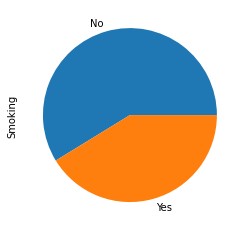

In [11]:
heart.Smoking.value_counts().plot(kind='pie');

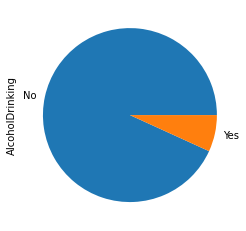

In [12]:
heart.AlcoholDrinking.value_counts().plot(kind='pie');

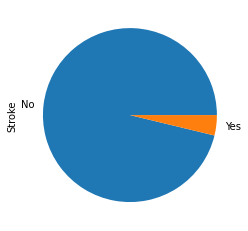

In [13]:
heart.Stroke.value_counts().plot(kind='pie');

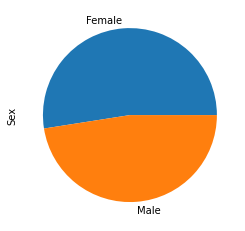

In [14]:
heart.Sex.value_counts().plot(kind='pie');

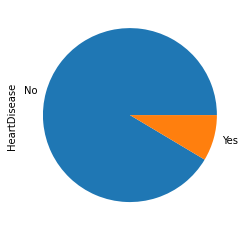

In [18]:
heart.HeartDisease.value_counts().plot(kind='pie');

In [15]:

# example of random undersampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
# define dataset
X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
# summarize class distribution
print(Counter(y))
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_over, y_over = undersample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({0: 9900, 1: 100})
Counter({0: 100, 1: 100})


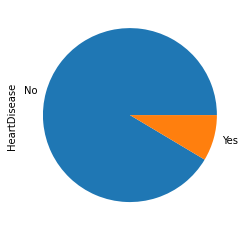

In [19]:
heart.HeartDisease.value_counts().plot(kind='pie');

In [16]:
# example of evaluating a decision tree with random undersampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
# define dataset
X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
# define pipeline
steps = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.780


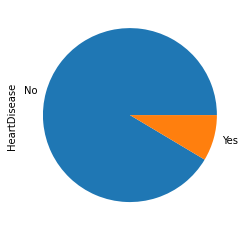

In [20]:
heart.HeartDisease.value_counts().plot(kind='pie');

In [17]:
# Split-out validation dataset
array = df.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

NameError: ignored